**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing the dataset**

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


**Data Pre-processing**

In [5]:
df.shape

(100, 4)

In [6]:
# Steps:

# 0. Pre-process + EDA + Feature Selection
# 1. Extract input and output columns
# 2. Scale the values
# 3. Train-test split
# 4. Train the model
# 5. Evaluate the model / model selection
# 6. Deploy the model

In [7]:
# First column - 'Unnamed:' - unnecessary, hence remove it.
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
df.shape # (100,3) means 100 rows and 3 columns

(100, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


**Visualizing the data**

In [11]:
df['placement'].unique() # returns all the unique output values present in the dataset

array([1, 0])

In [12]:
df_placed = df.iloc[list(df['placement']==1)] # dataframe of all placed students

In [13]:
df_not_placed = df.iloc[list(df['placement']==0)] # dataframe of all non-placed students

In [14]:
df_placed

,cgpa,iq,placement
0,6.8,123.0,1
3,7.4,132.0,1
5,7.1,48.0,1
10,6.0,45.0,1
11,6.9,138.0,1
13,6.4,116.0,1
20,6.6,120.0,1
21,7.1,151.0,1
26,7.0,199.0,1
27,6.0,124.0,1


In [15]:
df_not_placed

,cgpa,iq,placement
1,5.9,106.0,0
2,5.3,121.0,0
4,5.8,142.0,0
6,5.7,143.0,0
7,5.0,63.0,0
8,6.1,156.0,0
9,5.1,66.0,0
12,5.4,139.0,0
14,6.1,103.0,0
15,5.1,176.0,0


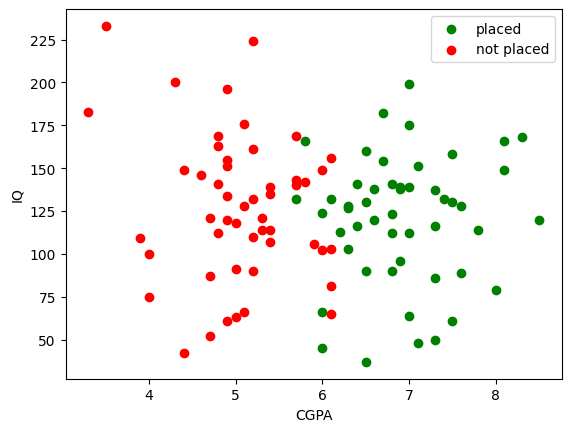

In [16]:
plt.scatter(df_placed['cgpa'], df_placed['iq'], c='green', label='placed')
plt.scatter(df_not_placed['cgpa'], df_not_placed['iq'], c='red', label='not placed')

plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.legend(loc='upper right')

**Extracting input and output values**

In [17]:
X = df.iloc[:,:-1] # input values
y = df.iloc[:,-1] # output values

In [18]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [19]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [20]:
X.shape

(100, 2)

In [21]:
y.shape

(100,)

**Train-test split**

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% training data, 20% test data, random_state extremely important

In [23]:
X_train

,cgpa,iq
43,6.8,141.0
62,6.0,102.0
3,7.4,132.0
71,6.1,132.0
45,6.0,66.0
...,...,...
96,4.4,42.0
67,5.0,118.0
64,7.0,64.0
47,5.2,161.0


In [24]:
y_train

43    1
62    0
3     1
71    1
45    1
     ..
96    0
67    0
64    1
47    0
44    1
Name: placement, Length: 80, dtype: int64

In [25]:
X_test

,cgpa,iq
26,7.0,199.0
86,5.1,128.0
2,5.3,121.0
55,7.8,114.0
75,4.8,169.0
93,6.8,112.0
16,5.2,224.0
73,4.9,61.0
54,6.4,141.0
95,4.3,200.0


In [26]:
y_test

26    1
86    0
2     0
55    1
75    0
93    1
16    0
73    0
54    1
95    0
53    1
92    0
78    0
13    1
7     0
30    1
22    0
24    0
33    0
8     0
Name: placement, dtype: int64

**Feature Scaling**

In [27]:
# Standardizing training data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train

array([[ 0.68722958,  0.51773529],
       [-0.01313178, -0.48995909],
       [ 1.21250059,  0.28519043],
       [ 0.07441339,  0.28519043],
       [-0.01313178, -1.42013852],
       [ 0.51213924,  0.44022033],
       [-0.27576728,  0.56941192],
       [ 0.16195856, -0.2057376 ],
       [ 0.42459407, -2.16944973],
       [-0.97612864,  0.87947173],
       [ 0.77477475,  0.46605865],
       [-0.97612864,  1.93884275],
       [ 1.12495542, -0.90337217],
       [-1.76403516, -1.18759367],
       [-1.06367381,  0.51773529],
       [-0.01313178,  0.07848389],
       [-1.76403516, -0.54163573],
       [ 0.07441339, -1.44597684],
       [ 0.24950373,  0.18183716],
       [ 0.59968441,  0.85363341],
       [-0.10067694, -0.38660582],
       [ 1.12495542,  0.41438202],
       [ 1.38759093, -0.82585722],
       [-0.53840279, -0.17989929],
       [-0.18822211,  0.5435736 ],
       [-0.8010383 ,  1.4220764 ],
       [-2.37685134,  1.60294462],
       [-0.97612864,  0.33686706],
       [ 0.42459407,

In [29]:
X_test

array([[ 8.62319917e-01,  2.01635770e+00],
       [-8.01038298e-01,  1.81837159e-01],
       [-6.25947960e-01,  9.68936905e-04],
       [ 1.56268127e+00, -1.79899285e-01],
       [-1.06367381e+00,  1.24120817e+00],
       [ 6.87229578e-01, -2.31575920e-01],
       [-7.13493129e-01,  2.66231564e+00],
       [-9.76128637e-01, -1.54933011e+00],
       [ 3.37048902e-01,  5.17735286e-01],
       [-1.50139965e+00,  2.04219602e+00],
       [ 2.00040712e+00,  1.21536986e+00],
       [-7.13493129e-01, -2.83252555e-01],
       [ 7.44133938e-02, -1.03256376e+00],
       [ 3.37048902e-01, -1.28222650e-01],
       [-8.88583468e-01, -1.49765348e+00],
       [ 1.38759093e+00,  1.81837159e-01],
       [-9.76128637e-01, -2.48693806e-02],
       [-1.15121898e+00,  9.68936905e-04],
       [-1.31317754e-02,  7.24441826e-01],
       [ 7.44133938e-02,  9.05310048e-01]])

**Training the model**

In [33]:
# We use Logistic Regression here since this is a classification problem.

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [34]:
# Training the model with training data

clf.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred = clf.predict(X_test)

In [40]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1])

In [38]:
y_test

26    1
86    0
2     0
55    1
75    0
93    1
16    0
73    0
54    1
95    0
53    1
92    0
78    0
13    1
7     0
30    1
22    0
24    0
33    0
8     0
Name: placement, dtype: int64

**Comparing predicted output with actual output**

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.85

**Plotting the decision boundary**

<Axes: >

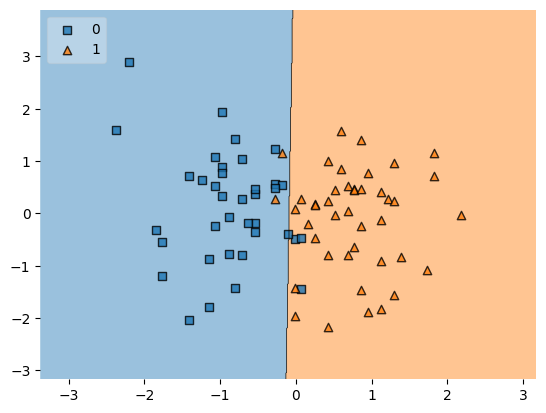

In [45]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2) # 0 - not placed, 1 - placed

**Converting the trained model into a file for deployment**

In [46]:
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))